In [10]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extract_data_from_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        content = content.replace('\r\n', '\n')
    
    # print("\n" + "="*50 + "\n")
    pattern = r"(?:New best for swarm at iteration|Best after iteration) (\d+): \[([-+\de.\s\n]+)\] ([\d.e-]+)"
    # print("Regex pattern:")
    # print(pattern)
    # print("\n" + "="*50 + "\n")
    
    # Find all matches
    matches = re.findall(pattern, content, flags=re.DOTALL)
    if len(matches) == 0:
        raise ValueError("No matches found in the file.")
    
    data = []
    for match in matches:
        iteration = int(match[0])
        array_values = [float(x) for x in match[1].split()]
        cost_value = float(match[2])
        
        row = [iteration] + array_values + [cost_value]
        data.append(row)
    
    return data

In [11]:
def process_log_files(directory):
    all_data = []
    
    for filename in os.listdir(directory):
        print(filename)
        if filename.endswith('.txt'):
            file_path = os.path.join(directory, filename)
            file_data = extract_data_from_file(file_path)
            all_data.extend(file_data)
    
    # Create column names
    num_array_values = len(all_data[0]) - 2  # Subtract iteration and cost value
    columns = ['Iteration'] + [f'Value_{i+1}' for i in range(num_array_values)] + ['Cost']
    
    # Create DataFrame
    df = pd.DataFrame(all_data, columns=columns)
    
    return df

In [12]:
# Set the path to your log directory
log_directory = '/Users/fnoic/PycharmProjects/reconstruct/experiment_log/'

# Process the log files and create a DataFrame
result_df = process_log_files(log_directory)
result_df

output_1724932299.563581.txt
output_1724932267.766028.txt
output_1724932409.716011.txt
output_1724932336.616912.txt
output_1724932372.7459269.txt


,Iteration,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Cost
0,1,-0.814796,-7.399610,0.018886,0.016746,0.261437,0.325521,0.346556
1,1,-0.806006,-7.401382,0.020000,0.019130,0.268155,0.321000,0.336952
2,1,-0.796841,-7.385337,0.016411,0.005115,0.243174,0.325521,0.268114
3,1,-0.803612,-7.397291,0.013742,0.019732,0.248530,0.325521,0.249184
4,1,-0.803612,-7.397291,0.013742,0.019732,0.248530,0.325521,0.249184
...,...,...,...,...,...,...,...,...
722,98,-6.677437,0.524196,0.020000,0.018723,0.133285,0.100000,0.290714
723,99,-6.677435,0.524206,0.020000,0.018700,0.133285,0.100000,0.290708
724,99,-6.677435,0.524206,0.020000,0.018700,0.133285,0.100000,0.290708
725,100,-6.677433,0.524426,0.020000,0.018229,0.133285,0.100000,0.290689


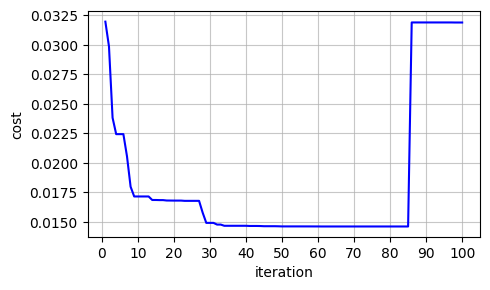

In [13]:
df = result_df.groupby('Iteration')['Cost'].agg(['min', 'max'])

plt.figure(figsize=(5, 3))
plt.plot(df.index, df['min'], color='blue', label='Min')
# plt.fill_between(df.index, df['min'], df['max'], alpha=0.3, color='blue')
plt.xlabel('iteration')

x_ticks = np.arange(0, 101, 10)
plt.xticks(x_ticks)

plt.ylabel('cost')
# plt.title('Min-Max Area Plot')
# plt.legend()
# plt.yscale('log')
plt.grid(True, linestyle='-', alpha=0.7)
# plt.xticks(df.index)  # Ensure all index values are shown on x-axis
plt.tight_layout()
plt.show()